<a href="https://www.kaggle.com/code/milansingh163/deliverytime?scriptVersionId=118282812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delivery-time/historical_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/delivery-time/historical_data.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
df.shape

(197428, 16)

In [4]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['market_id'].value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

In [7]:
df['store_id'].value_counts()

6865    937
1311    863
314     815
1686    765
3937    721
       ... 
1258      1
974       1
4260      1
6426      1
1845      1
Name: store_id, Length: 6743, dtype: int64

In [8]:
df[df['actual_delivery_time'].isnull()==True]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
109,3.0,2015-02-10 21:51:54,NaN,1698,sandwich,3.0,1,1125,1,975,975,7.0,5.0,4.0,251,488.0
7670,2.0,2015-02-08 02:54:42,NaN,2340,japanese,2.0,4,2860,3,390,690,131.0,123.0,197.0,251,723.0
78511,4.0,2015-02-15 02:15:45,NaN,901,catering,1.0,9,5050,6,375,1125,91.0,75.0,167.0,446,770.0
115982,4.0,2015-02-16 01:52:49,NaN,1107,pizza,3.0,2,2094,2,599,1195,53.0,53.0,102.0,251,433.0
140635,2.0,2015-02-15 02:21:42,NaN,1661,dessert,1.0,3,4210,3,865,1850,123.0,91.0,176.0,446,862.0
158967,2.0,2015-02-01 01:21:29,NaN,314,mexican,5.0,5,3447,3,225,1349,90.0,88.0,109.0,251,572.0
170416,5.0,2015-02-01 01:36:33,NaN,2651,fast,4.0,3,982,3,165,575,41.0,31.0,31.0,251,333.0


In [9]:
df = df[df['actual_delivery_time'].notna()]
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [10]:
df['store_primary_category'].value_counts()

american             19399
pizza                17320
mexican              17098
burger               10958
sandwich             10059
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [11]:
df['order_protocol'].value_counts()

1.0    54723
3.0    53197
5.0    44289
2.0    24051
4.0    19353
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [12]:
# leaving store features and only taking order featues for data 
df = df.dropna()
df.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [13]:
df.shape

(175777, 16)

In [14]:
# convert time created at and actual delivery time to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

In [15]:
df['actual_time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
df['actual_time_taken']

0         3779.0
1         4024.0
8         1586.0
14        2273.0
15        2988.0
           ...  
197423    3907.0
197424    3383.0
197425    3008.0
197426    3907.0
197427    2228.0
Name: actual_time_taken, Length: 175777, dtype: float64

In [16]:
df.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
actual_time_taken                               0
dtype: int64

In [17]:
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

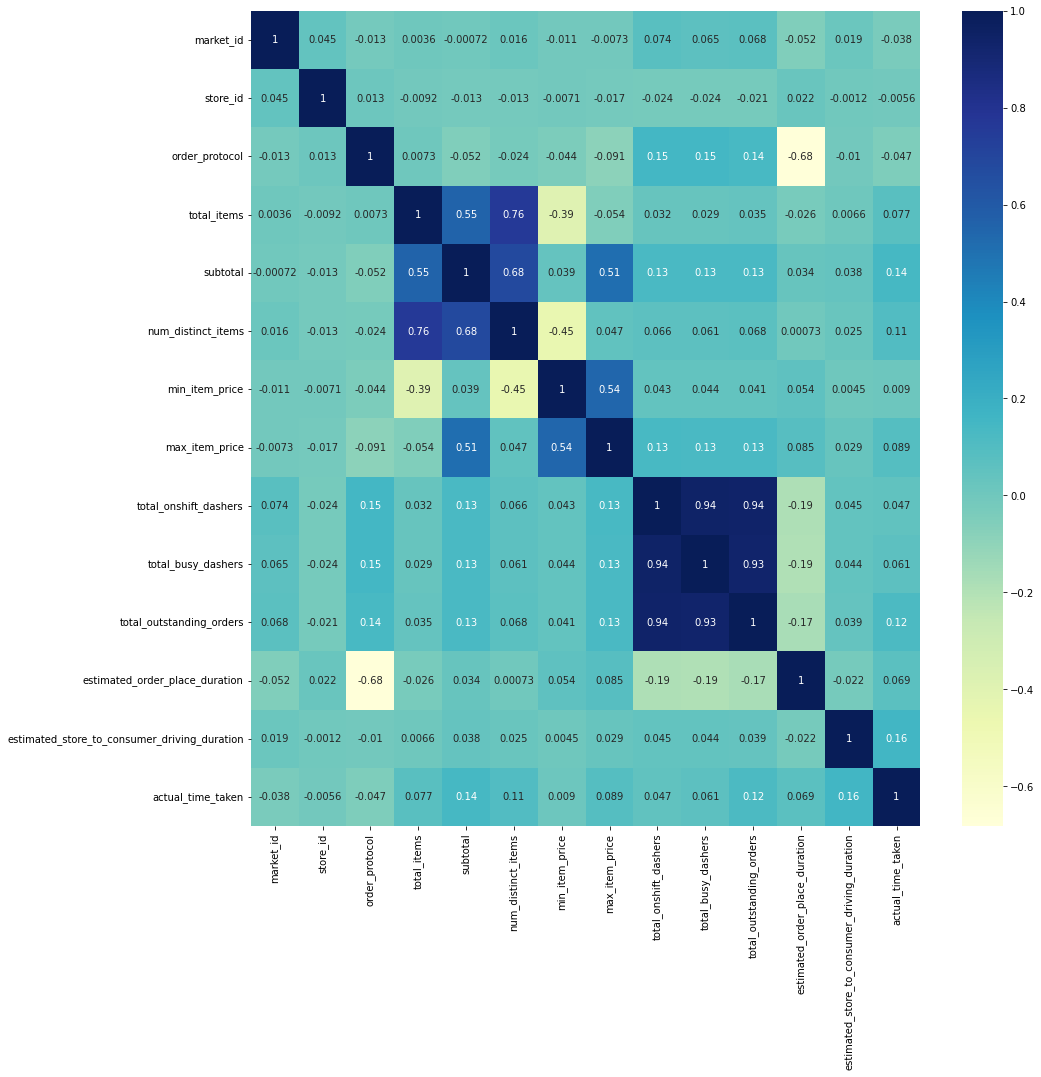

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

<AxesSubplot:ylabel='Density'>

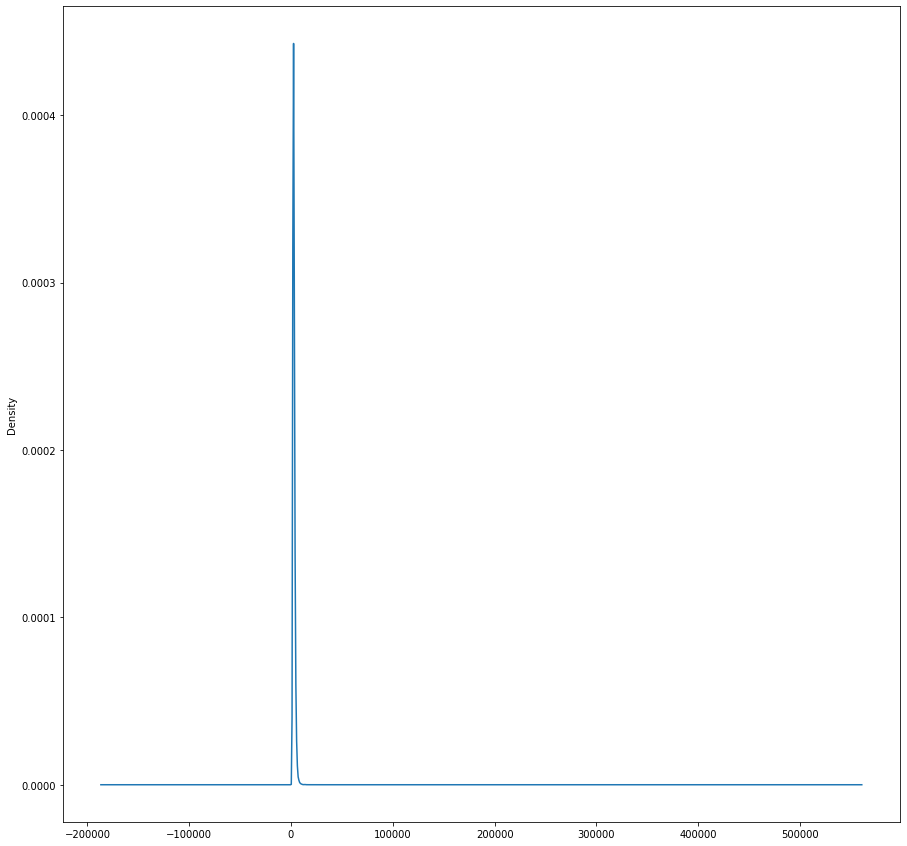

In [19]:
# store id ,min item price max item price does not seem relevent
# train test split 
# model building
# accuracy
plt.figure(figsize=(15, 15))
df['actual_time_taken'].plot(kind='kde')

In [20]:
import plotly.express as px
fig = px.box(df, y="actual_time_taken")
fig.show()

In [21]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:,:-1],df.iloc[:,-1]
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(175777, 16) (175777,)
(140621, 16) (35156, 16)
(140621,) (35156,)


In [22]:
# train test split 
# base line model
from sklearn.model_selection import train_test_split
selected_features = ['market_id','store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration']
X = df[selected_features]
y = df["actual_time_taken"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [23]:
from xgboost import XGBRegressor
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict=model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

regression_models = {
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}
RMSE = []
for model_name in regression_models.keys():
    make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)


Train error = 1680.5678698661015 in Ridge
Test error = 1040.7641043634972 in Ridge
Train error = 1418.066500441603 in DecisionTree
Test error = 1199.1699388035179 in DecisionTree
Train error = 630.1073980485614 in RandomForest
Test error = 1095.1286992040014 in RandomForest
Train error = 928.3274917035534 in XGBoost
Test error = 1185.7263763310254 in XGBoost


In [24]:
'''
The base line model is ready.
Now we are reaady to dig deep and try to get the best result by implementing following things
1. create new features
2. Apply scaling of the data a> standard scaling b> MinMax scaler
3. Treat catagorical features
4. Multicolinearity and corelation measurement using VIF and drop unnecessary column
5. Apply feature importance 
6. Hyperparameter Tuning
'''

'\nThe base line model is ready.\nNow we are reaady to dig deep and try to get the best result by implementing following things\n1. create new features\n2. Apply scaling of the data a> standard scaling b> MinMax scaler\n3. Treat catagorical features\n4. Multicolinearity and corelation measurement using VIF and drop unnecessary column\n5. Apply feature importance \n6. Hyperparameter Tuning\n'

In [25]:
for i in df.columns:
    print(i,' : ', len(df[i].unique()))

market_id  :  6
created_at  :  162649
actual_delivery_time  :  160269
store_id  :  5645
store_primary_category  :  73
order_protocol  :  7
total_items  :  54
subtotal  :  8182
num_distinct_items  :  20
min_item_price  :  2251
max_item_price  :  2585
total_onshift_dashers  :  172
total_busy_dashers  :  158
total_outstanding_orders  :  281
estimated_order_place_duration  :  94
estimated_store_to_consumer_driving_duration  :  1318
actual_time_taken  :  6981


In [26]:
# create new column busy_dasher_ratio = busy_dasher/total_dahser
df['busy_dasher_ratio'] = df.total_busy_dashers/df.total_onshift_dashers
df['busy_dasher_ratio']

0         0.424242
1         2.000000
8         0.750000
14        1.200000
15        1.000000
            ...   
197423    1.000000
197424    0.916667
197425    1.051282
197426    1.000000
197427    1.000000
Name: busy_dasher_ratio, Length: 175777, dtype: float64

In [27]:
# treating catagorical feature using once hot encoding
# we can use both get_dummies or one_hot_encoder from sk learn
# market_id has 6 catagories and orderprotocol has 7 catagories
# so overall 6+7 = 13 new columns will be created 
# busy dasher ration was onother column that was created
'''
'market_id_2.0', 'market_id_3.0',
       'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_1.0',
       'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0',
       'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0'
'''
# store id also catagorical but ordinal value is high
df_onehot = pd.get_dummies(df, columns = ['market_id','order_protocol'])
df_onehot.shape

(175777, 29)

In [28]:
df_onehot.columns

Index(['created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'actual_time_taken',
       'busy_dasher_ratio', 'market_id_1.0', 'market_id_2.0', 'market_id_3.0',
       'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_1.0',
       'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0',
       'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0'],
      dtype='object')

In [29]:
spm = df.groupby(['store_primary_category']).size()/len(df)
df['spc_encoded'] = df['store_primary_category'].apply(lambda x: spm[x])
df['spc_encoded']

0         0.103444
1         0.088669
8         0.036285
14        0.038304
15        0.038304
            ...   
197423    0.036950
197424    0.036950
197425    0.036950
197426    0.051173
197427    0.051173
Name: spc_encoded, Length: 175777, dtype: float64

In [30]:
store_id_encoded = df.groupby(['store_id']).size()/len(df)
df['store_id_enc'] = df['store_id'].apply(lambda x: store_id_encoded[x])
df['store_id_enc']

0         0.000006
1         0.000011
8         0.000011
14        0.000028
15        0.000028
            ...   
197423    0.000432
197424    0.000432
197425    0.000432
197426    0.000011
197427    0.000011
Name: store_id_enc, Length: 175777, dtype: float64

In [31]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'actual_time_taken',
       'busy_dasher_ratio', 'spc_encoded', 'store_id_enc'],
      dtype='object')

In [32]:
df_onehot['busy_dasher_ratio'].describe()

count    1.722740e+05
mean              NaN
std               NaN
min              -inf
25%      8.281250e-01
50%      9.629630e-01
75%      1.000000e+00
max               inf
Name: busy_dasher_ratio, dtype: float64

In [33]:
training_data = pd.concat([df_onehot,df['spc_encoded'],df['store_id_enc']],axis=1)
training_data.shape

(175777, 31)

In [34]:
# align dtype over dataset
# training_df = train_df.astype("float32")
# replace inf values with nan to drop all nans
training_data.replace([np.inf, -np.inf], np.nan, inplace=True)
training_data.dropna(inplace=True)
training_data.head()

,created_at,actual_delivery_time,store_id,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,market_id_6.0,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,spc_encoded,store_id_enc
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,4,3441,4,557,1239,33.0,...,0,1,0,0,0,0,0,0,0.103444,0.000006
1,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,1,1900,1,1400,1400,1.0,...,0,0,1,0,0,0,0,0,0.088669,0.000011
8,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,4,4771,3,820,1604,8.0,...,0,0,0,1,0,0,0,0,0.036285,0.000011
14,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1,1525,1,1525,1525,5.0,...,0,1,0,0,0,0,0,0,0.038304,0.000028
15,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,2,3620,2,1425,2195,5.0,...,0,1,0,0,0,0,0,0,0.038304,0.000028


In [35]:
train_df = training_data.drop(columns = ["created_at", "store_id", "store_primary_category", "actual_delivery_time"])
train_df.head()
train_df = train_df.astype("float32")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172236 entries, 0 to 197427
Data columns (total 27 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   total_items                                   172236 non-null  float32
 1   subtotal                                      172236 non-null  float32
 2   num_distinct_items                            172236 non-null  float32
 3   min_item_price                                172236 non-null  float32
 4   max_item_price                                172236 non-null  float32
 5   total_onshift_dashers                         172236 non-null  float32
 6   total_busy_dashers                            172236 non-null  float32
 7   total_outstanding_orders                      172236 non-null  float32
 8   estimated_order_place_duration                172236 non-null  float32
 9   estimated_store_to_consumer_driving_duration  17

In [36]:
np.where(np.any(~np.isfinite(train_df),axis=0) == True)

(array([], dtype=int64),)

In [37]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop all nans

In [38]:
train_df.dropna(inplace=True)
train_df.shape

(172236, 27)

In [39]:
# confirm there is not any remaining nans
train_df.isna().sum().sum()

0

<AxesSubplot:>

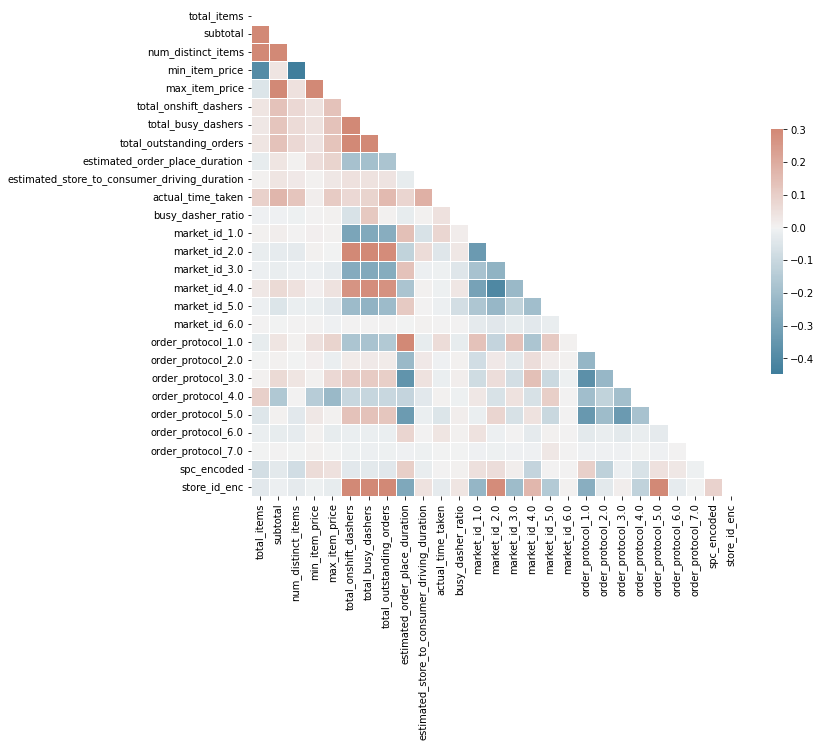

In [40]:
import seaborn as sns
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
train_df["percent_distinct_item_of_total"] = train_df["num_distinct_items"] / train_df["total_items"]
train_df["avg_price_per_item"] = train_df["subtotal"] / train_df["total_items"]
train_df.drop(columns=["num_distinct_items", "subtotal"], inplace=True)

In [42]:
train_df.columns

Index(['total_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'actual_time_taken',
       'busy_dasher_ratio', 'market_id_1.0', 'market_id_2.0', 'market_id_3.0',
       'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_1.0',
       'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0',
       'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0',
       'spc_encoded', 'store_id_enc', 'percent_distinct_item_of_total',
       'avg_price_per_item'],
      dtype='object')

In [43]:
train_df["price_range_of_items"] = train_df["max_item_price"] - train_df["min_item_price"]
train_df.drop(columns=["max_item_price", "min_item_price"], inplace=True)

In [44]:
train_df.shape

(172236, 26)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# definnign a function for calculating VIF
def compute_vif(features):
    """Compute VIF score using variance_inflation_factor() function"""
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data
features = train_df.drop(columns=["actual_time_taken"]).columns.to_list()
vif_data = compute_vif(features)
vif_data = vif_data.sort_values(['VIF'])
vif_data

,feature,VIF
24,price_range_of_items,2.219786e+00
21,store_id_enc,2.549556e+00
20,spc_encoded,3.712438e+00
0,total_items,3.804657e+00
23,avg_price_per_item,5.444465e+00
5,estimated_store_to_consumer_driving_duration,7.320364e+00
6,busy_dasher_ratio,8.975475e+00
3,total_outstanding_orders,2.221767e+01
22,percent_distinct_item_of_total,3.380819e+01
1,total_onshift_dashers,4.060401e+01


In [46]:
'''
1
Tuples are an important data structure in Python because they are immutable, 
meaning that once they are defined, they cannot be changed. 
Tuples are used to store related data together, and they are especially useful when
a function needs to return multiple values. Tuples can also be used to represent 
records, as a way of organizing more complex data. Tuples can be used in place of 
lists when the order of the elements is important, and you don't want the elements 
to be changed. Additionally, tuples can be used as 
keys in dictionaries, which is an important data structure in Python.

2
Tuples in Python have two in-built methods:



count(): This method is used to count the number of times an item appears in a tuple.
For example, given a tuple t = (1,2,2,4,4,4), t.count(4) will return the result 3.


index(): This method is used to find the index of the first occurrence of an item in a
tuple.
For example, given a tuple t = (1,2,3,4,5,6), t.index(3) will return the result 2.



Tuples have only two in-built methods as compared to Lists because Tuples are immutable,
meaning that once a Tuple is created, its elements cannot be modified or removed. 
Therefore, Tuples do not require as many methods as Lists to manage the elements, 
since their elements cannot be changed.

'''

# l1 =[1, 1, 1, 2, 1, 3, 1, 4, 2, 1, 2, 2, 2, 3, 2, 4, 3, 1, 3, 2, 3, 3, 3, 4, 4, 1, 4, 2, 4, 3, 4, 4]
# print(set(l1))

"\n1\nTuples are an important data structure in Python because they are immutable, \nmeaning that once they are defined, they cannot be changed. \nTuples are used to store related data together, and they are especially useful when\na function needs to return multiple values. Tuples can also be used to represent \nrecords, as a way of organizing more complex data. Tuples can be used in place of \nlists when the order of the elements is important, and you don't want the elements \nto be changed. Additionally, tuples can be used as \nkeys in dictionaries, which is an important data structure in Python.\n\n2\nTuples in Python have two in-built methods:\n\n\n\ncount(): This method is used to count the number of times an item appears in a tuple.\nFor example, given a tuple t = (1,2,2,4,4,4), t.count(4) will return the result 3.\n\n\nindex(): This method is used to find the index of the first occurrence of an item in a\ntuple.\nFor example, given a tuple t = (1,2,3,4,5,6), t.index(3) will ret

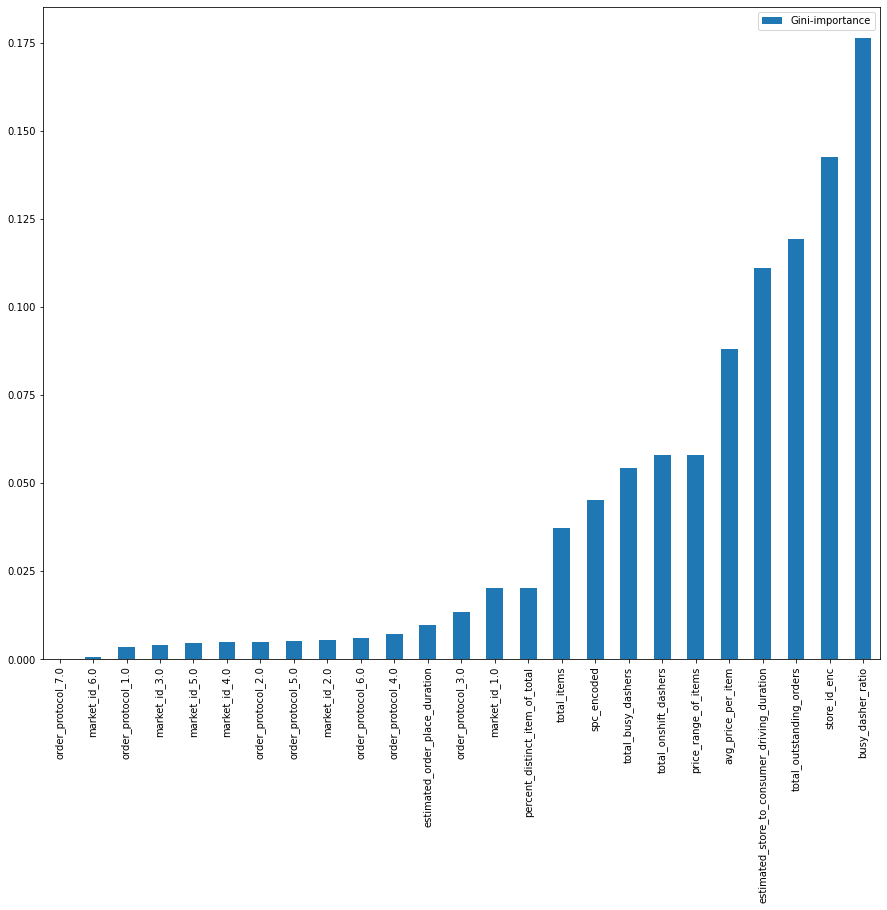

In [47]:
# feature selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = train_df[features]
y = train_df["actual_time_taken"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


feature_names = [f'feature {i}' for i in range((X.shape[1])) ]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats={}
for feature,importance in zip(X.columns,forest.feature_importances_):
    feats[feature]=importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(scaler, X, y):
    """Apply the selected scaler to features and target variables"""
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [49]:
X_scaled, y_scaled,X_scaler,y_scaler = scale(MinMaxScaler(), X, y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42)

In [50]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


def rmse_with_inv_transform(scaler,y_test,y_pred_scaled,model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    rmse_error = mean_squared_error(y_test,y_predict[:,0],squared=False)
    print("Error : {}".format(rmse_error)+" in "+model_name)
    return rmse_error,y_predict


def make_regression(X_train,y_train,X_test,y_test,model,model_name,verbose=True):
    model.fit(X_train,y_train)
    y_predict = model.predict(X_train)
    train_error = mean_squared_error(y_train,y_predict,squared=False)
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test,y_predict,squared = False)
    if verbose:
        print("Train_error : {}".format(train_error)+" in "+model_name)
        print("Train_error : {}".format(train_error)+" in "+model_name)

    trained_model=model
    return trained_model,y_predict,train_error,test_error


In [51]:
pred_dict = {
    'regression_model':[],
    'feature_set':[],
    'scaler_name':[],
    'RMSE' : []
    
}
regression_models={
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "MLP":  MLPRegressor(),
}

feature_sets={
    "full dataset": X.columns.to_list(),
    "selected_features_40": importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    "selected_features_20": importances.sort_values(by='Gini-importance')[-15:].index.tolist(),
    "selected_features_10": importances.sort_values(by='Gini-importance')[-10:].index.tolist(), 

}

scalers={
    "Standard scaler": StandardScaler(),
    "MinMax scaler": MinMaxScaler(),
    "NotScale": None,
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():   
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df["actual_time_taken"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
            
            else:
                
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict["regression_model"].append(model_name)
            pred_dict["feature_set"].append(feature_set_name)
            pred_dict["scaler_name"].append(scaler_name)
            pred_dict["RMSE"].append(rmse_error)

-----scaled with Standard scaler-------- included columns are full dataset

Error : 1054.0333251953125 in Ridge
Error : 1089.531227577823 in DecisionTree
Error : 1087.5019397329988 in RandomForest
Error : 1062.4149169921875 in XGBoost
Error : 1021.1872116227628 in LGBM
Error : 1013.2672729492188 in MLP
-----scaled with MinMax scaler-------- included columns are full dataset

Error : 1051.5223388671875 in Ridge
Error : 1089.5312275309022 in DecisionTree
Error : 1150.6897735603193 in RandomForest
Error : 1069.74365234375 in XGBoost
Error : 1019.435294912503 in LGBM
Error : 1497.4676513671875 in MLP
-----scaled with NotScale-------- included columns are full dataset

Train_error : 1344.7532958984375 in Ridge
Train_error : 1344.7532958984375 in Ridge


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=2.46635e-11): result may not be accurate.



Train_error : 1272.470561760121 in DecisionTree
Train_error : 1272.470561760121 in DecisionTree
Train_error : 506.6151852626089 in RandomForest
Train_error : 506.6151852626089 in RandomForest
Train_error : 875.7346801757812 in XGBoost
Train_error : 875.7346801757812 in XGBoost
Train_error : 1153.9987926954282 in LGBM
Train_error : 1153.9987926954282 in LGBM


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Train_error : 1318.34716796875 in MLP
Train_error : 1318.34716796875 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_40

Error : 1054.0770263671875 in Ridge
Error : 1089.531227577823 in DecisionTree
Error : 1119.0421460097127 in RandomForest
Error : 1078.53271484375 in XGBoost
Error : 1019.8249427712245 in LGBM
Error : 1011.2262573242188 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_40

Error : 1051.5606689453125 in Ridge
Error : 1089.5312275309022 in DecisionTree
Error : 1096.202132200984 in RandomForest
Error : 1093.1279296875 in XGBoost
Error : 1020.698243268873 in LGBM
Error : 1120.9703369140625 in MLP
-----scaled with NotScale-------- included columns are selected_features_40

Train_error : 1344.853759765625 in Ridge
Train_error : 1344.853759765625 in Ridge


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=2.70133e-11): result may not be accurate.



Train_error : 1272.470561760121 in DecisionTree
Train_error : 1272.470561760121 in DecisionTree
Train_error : 512.6270138385412 in RandomForest
Train_error : 512.6270138385412 in RandomForest
Train_error : 888.0309448242188 in XGBoost
Train_error : 888.0309448242188 in XGBoost
Train_error : 1150.3310589935356 in LGBM
Train_error : 1150.3310589935356 in LGBM
Train_error : 1320.8768310546875 in MLP
Train_error : 1320.8768310546875 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_20

Error : 1057.037353515625 in Ridge
Error : 1089.646041841974 in DecisionTree
Error : 1083.0422340337418 in RandomForest
Error : 1136.29248046875 in XGBoost
Error : 1032.1246994518488 in LGBM
Error : 1028.601318359375 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_20

Error : 1054.5538330078125 in Ridge
Error : 1089.646041795797 in DecisionTree
Error : 1079.4008210390257 in RandomForest
Error : 1024.53662109375 in XGBoost
Error : 1022.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=2.72805e-11): result may not be accurate.



Train_error : 1272.4817731719277 in DecisionTree
Train_error : 1272.4817731719277 in DecisionTree
Train_error : 491.5809530977197 in RandomForest
Train_error : 491.5809530977197 in RandomForest
Train_error : 888.2520141601562 in XGBoost
Train_error : 888.2520141601562 in XGBoost
Train_error : 1158.6321026903624 in LGBM
Train_error : 1158.6321026903624 in LGBM
Train_error : 1325.59326171875 in MLP
Train_error : 1325.59326171875 in MLP
-----scaled with Standard scaler-------- included columns are selected_features_10

Error : 1069.53564453125 in Ridge
Error : 1239.7637266170264 in DecisionTree
Error : 1066.6730401903037 in RandomForest
Error : 1034.185302734375 in XGBoost
Error : 1031.6531934694265 in LGBM
Error : 1025.1513671875 in MLP
-----scaled with MinMax scaler-------- included columns are selected_features_10

Error : 1067.597900390625 in Ridge
Error : 1239.7637171744188 in DecisionTree
Error : 1066.3722914863965 in RandomForest
Error : 1052.8203125 in XGBoost
Error : 1028.1266143

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=2.78244e-11): result may not be accurate.



Train_error : 1276.3329032843737 in DecisionTree
Train_error : 1276.3329032843737 in DecisionTree
Train_error : 511.5533833689223 in RandomForest
Train_error : 511.5533833689223 in RandomForest
Train_error : 912.0859985351562 in XGBoost
Train_error : 912.0859985351562 in XGBoost
Train_error : 1172.9411300691672 in LGBM
Train_error : 1172.9411300691672 in LGBM
Train_error : 1338.194580078125 in MLP
Train_error : 1338.194580078125 in MLP
